# Lead Scoring Case Study

### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

There are a lot of leads generated in the initial stage, but only a few of them come out as paying customers. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion. 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to **build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance**. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### Goals of the Case Study

- Build a **logistic regression model** to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

## Importing Packages

In [1]:
# Importing all required packages
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from datetime import datetime as dt

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
import pandas as pd

## Inspecting data

In [2]:
#reading Dataset
leads_df = pd.read_csv("leads.csv",  sep = ',',encoding = "ISO-8859-1")
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#Inspecting shape of data
leads_df.shape

(9240, 37)

In [4]:
#Datatypes of each column
leads_df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [5]:
#checking info of leads data set
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [6]:
#desribe dataset
leads_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,NaN,12.000000,NaN,NaN,NaN
50%,615479.000000,0.000000,NaN,248.000000,NaN,NaN,NaN
75%,637387.250000,1.000000,NaN,936.000000,NaN,NaN,NaN
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
#Checking if data has duplicates
sum(leads_df.duplicated(subset = 'Prospect ID')) == 0
#There are no duplicates

True

In [8]:
#check for duplicates
sum(leads_df.duplicated(subset = 'Lead Number')) == 0
#There are no duplicates

True

## EXPLORATORY DATA ANALYSIS

### Data Cleaning and Treatment

### `Prospect ID`

In [9]:
#dropping Prospect ID since they have all unique values

leads_df.drop(['Prospect ID'], 1, inplace = True)

leads_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [10]:
#checking shape after deleting
leads_df.shape

(9240, 36)

In [11]:
#Converting 'Select' values to NaN.

leads_df = leads_df.replace('Select', np.nan)

In [12]:
#checking null values in each rows

leads_df.isnull().sum()

Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

In [13]:
#checking null values percentage in each rows

round(leads_df.isnull().sum()/len(leads_df.index)*100,2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [14]:
# dropping columns with 50% and more null values


for col in leads_df.columns:
    if (round(leads_df[col].isnull().sum()/len(leads_df.index)*100,2)>=50):
        leads_df.drop(col,1,inplace = True)


### Remove columns which has only one unique value

Remove columns which has only one unique value
- Magazine
- Receive More Updates About Our Courses
- Update me on Supply Chain Content
- I agree to pay the amount through cheque
- Get updates on DM Content

In [15]:
# Dropping these columns as they have only one unique value and hence cannot be responsible in predicting a successful lead case
  
leads_df= leads_df.loc[:,leads_df.nunique()!=1]


In [16]:
#checking shape after removing columns

leads_df.shape

(9240, 28)

In [17]:
#checking null values percentage in each rows

round(leads_df.isnull().sum()/len(leads_df.index)*100,2).sort_values(ascending=False)

Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Converted                                         0.00
Total Time Spent on Website                       0.00
Do Not Call                                       0.00
Do Not Email                                      0.00
Lead Origi

###  Treating Cloumns <br> Asymmetrique Activity Index <br> Asymmetrique Activity Score <br> Asymmetrique Profile Index <br> Asymmetrique Profile Score

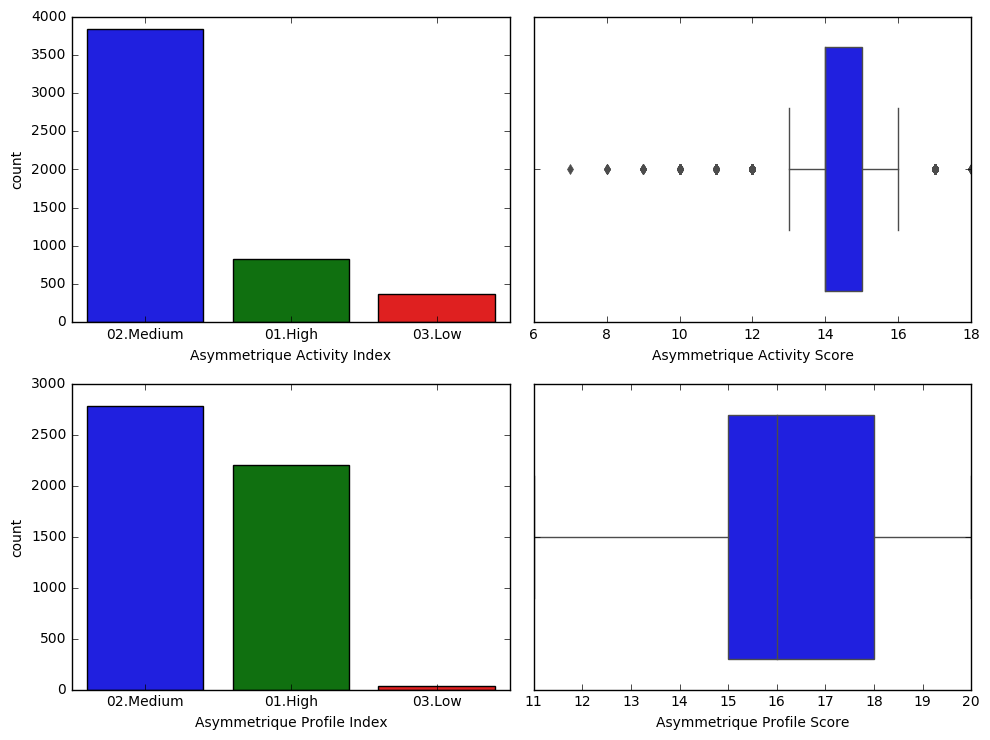

In [18]:
#Lets plot for the Asymmetrique cloumns , and measure of An index and score assigned to each customer based on their activity and their profile
fig, axs = plt.subplots(2,2, figsize = (10,7.5))
plt1 = sns.countplot(leads_df['Asymmetrique Activity Index'], ax = axs[0,0])
plt2 = sns.boxplot(leads_df['Asymmetrique Activity Score'], ax = axs[0,1])
plt3 = sns.countplot(leads_df['Asymmetrique Profile Index'], ax = axs[1,0])
plt4 = sns.boxplot(leads_df['Asymmetrique Profile Score'], ax = axs[1,1])
plt.tight_layout()

As seen from above graphs the Count for 'Medium' is more in case of 'Asymmetrique Activity Index'  and 'Asymmetrique Profile Index'

In [19]:
# Creating a new category consisting on NULL/Select values for the field Asymmetrique Profile Index

leads_df['Asymmetrique Profile Index'].value_counts()

02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [20]:
#Getting count of null records

leads_df['Asymmetrique Profile Index'].isnull().sum()

4218

In [21]:
#Create new category named Unknown for null values
leads_df['Asymmetrique Profile Index'].fillna("Unknown", inplace = True)
leads_df['Asymmetrique Profile Index'].value_counts()

Unknown      4218
02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

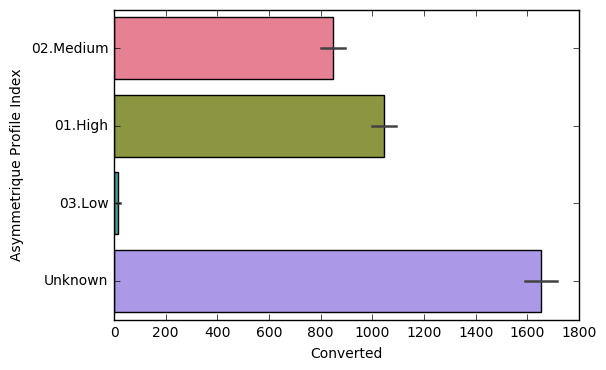

In [22]:
#Plotting barplot after creating 'Unkown' category

sns.barplot(y='Asymmetrique Profile Index', x='Converted', palette='husl', data=leads_df, estimator=np.sum)

In [23]:
# Creating a new category consisting on NULL/Select values for the field Asymmetrique Activity Index

leads_df['Asymmetrique Activity Index'].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [24]:
#Getting count of null records

leads_df['Asymmetrique Activity Index'].isnull().sum()

4218

In [25]:
#Create new category named Unknown for null values
leads_df['Asymmetrique Activity Index'].fillna("Unknown", inplace = True)
leads_df['Asymmetrique Activity Index'].value_counts()

Unknown      4218
02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

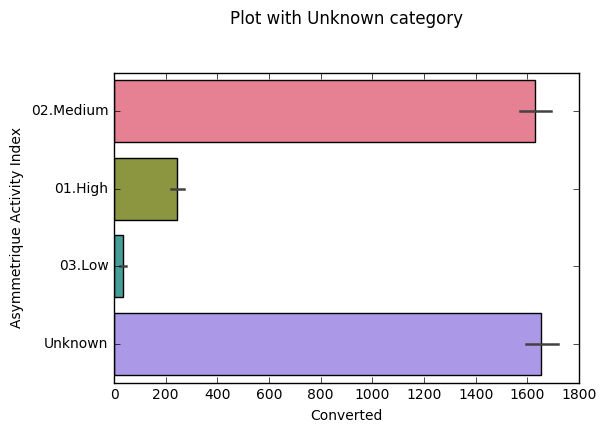

In [26]:
#Plotting barplot after creating new category

sns.barplot(y='Asymmetrique Activity Index', x='Converted', palette='husl', data=leads_df, estimator=np.sum)
plt.title('Plot with Unknown category\n\n')

In [27]:
# Deleting the columns 'Asymmetrique Activity Score' & 'Asymmetrique Profile Score' as they will be represented by their corresponding index columns
leads_df = leads_df.drop('Asymmetrique Activity Score', axis=1)
leads_df = leads_df.drop('Asymmetrique Profile Score', axis=1)
leads_df.shape

(9240, 26)

In [28]:
#checking null values percentage in each rows

round(leads_df.isnull().sum()/len(leads_df.index)*100,2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Last Notable Activity                             0.00
A free copy of Mastering The Interview            0.00
Search                                            0.00
Newspaper 

### `City`

In [29]:
# Creating a new category consisting on NULL/Select values for the field City

leads_df['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [30]:
#Getting count of null records

leads_df['City'].isnull().sum()

3669

In [31]:
#Create new category named Unknown for null values
leads_df['City'].fillna("Unknown", inplace = True)
leads_df['City'].value_counts()

Unknown                        3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

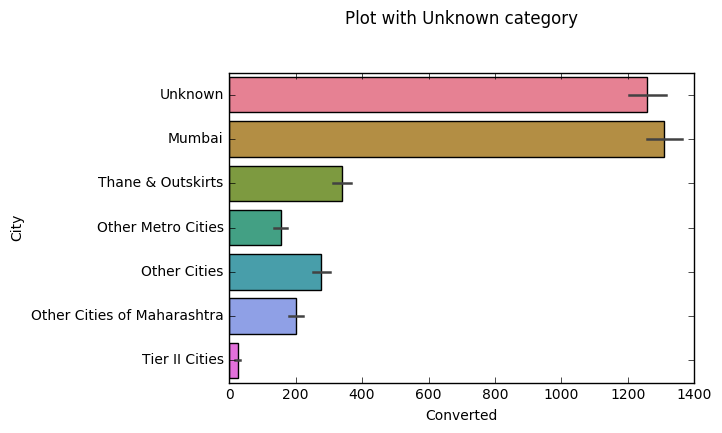

In [32]:
#Plotting barplot after creating new category

sns.barplot(y='City', x='Converted', palette='husl', data=leads_df, estimator=np.sum)
plt.title('Plot with Unknown category\n\n')

In [33]:
#checking null values percentage in each rows

round(leads_df.isnull().sum()/len(leads_df.index)*100,2).sort_values(ascending=False)

Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Last Notable Activity                             0.00
A free copy of Mastering The Interview            0.00
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

### `Specialization`

In [34]:
# Creating a new category consisting on NULL/Select values for the field Specialization

leads_df['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [35]:
#Getting count of null records

leads_df['Specialization'].isnull().sum()

3380

In [36]:
#Create new category named Unknown for null values
leads_df['Specialization'].fillna("Unknown", inplace = True)
leads_df['Specialization'].value_counts()

Unknown                              3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

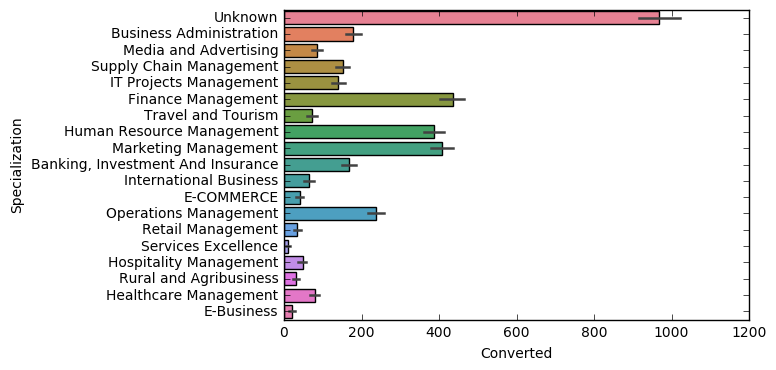

In [37]:
#Plotting barplot after creating new category

sns.barplot(y='Specialization', x='Converted', palette='husl', data=leads_df, estimator=np.sum)

We see that specialization with Management in them have higher number of leads as well as leads converted. So this is definitely a significant variable and should not be dropped.

In [38]:
#combining Management Specializations because they show similar trends

leads_df['Specialization'] = leads_df['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

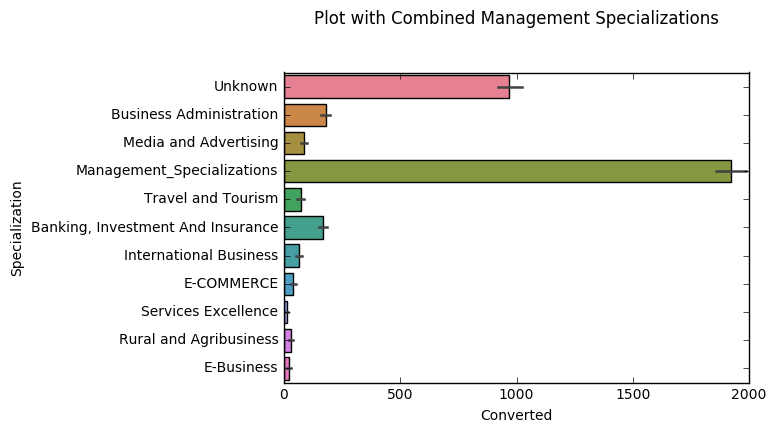

In [39]:
#Plotting barplot after creating new category

sns.barplot(y='Specialization', x='Converted', palette='husl', data=leads_df, estimator=np.sum)
plt.title('Plot with Combined Management Specializations\n\n')

### `Tags`

In [40]:
# Creating a new category consisting on NULL/Select values for the field Tags

leads_df['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [41]:
#Getting count of null records

leads_df['Tags'].isnull().sum()

3353

In [42]:
#Create new category named Unknown for null values
leads_df['Tags'].fillna("Unknown", inplace = True)
leads_df['Tags'].value_counts()

Unknown                                              3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

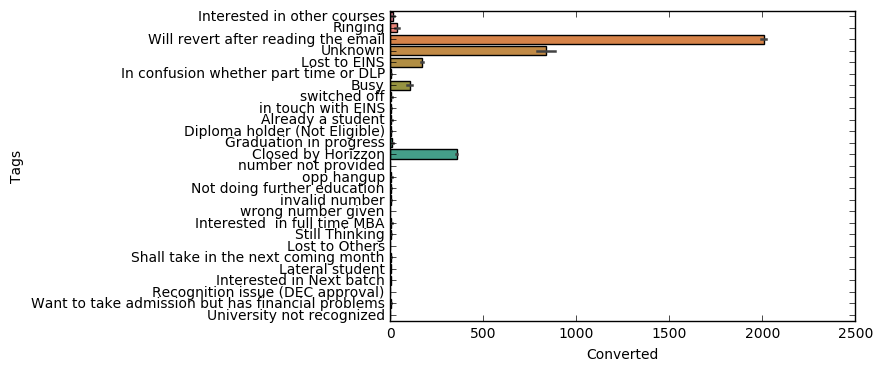

In [43]:
#Plotting barplot after creating new category

sns.barplot(y='Tags', x='Converted', palette='husl', data=leads_df, estimator=np.sum)

In [44]:
#replacing tags with low frequency with "Other Tags"
leads_df['Tags'] = leads_df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

leads_df['Tags'] = leads_df['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

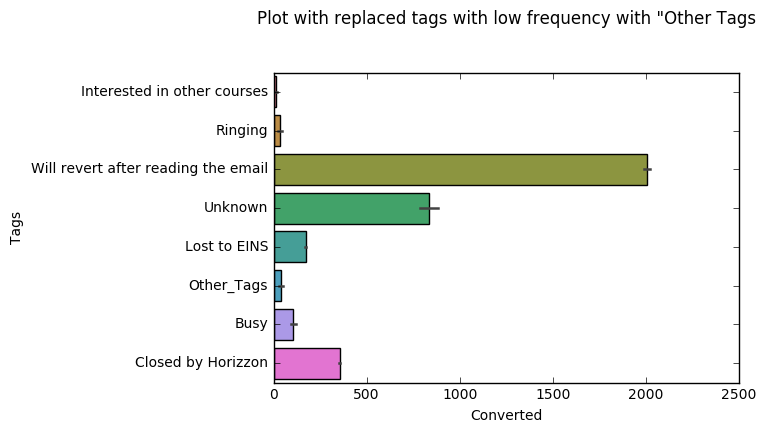

In [45]:
#Plotting barplot after creating new category

sns.barplot(y='Tags', x='Converted', palette='husl', data=leads_df, estimator=np.sum)
plt.title('Plot with replaced tags with low frequency with "Other Tags\n\n')

In [46]:
#checking null values percentage in each rows

round(leads_df.isnull().sum()/len(leads_df.index)*100,2).sort_values(ascending=False)

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Specialization                                    0.00
Lead Origin                                       0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Last Notable Activity                             0.00
A free copy of Mastering The Interview            0.00
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

### `What matters most to you in choosing a course`

In [47]:
# Creating a new category consisting on NULL/Select values for the field `What matters most to you in choosing a course`

leads_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [48]:
#Getting count of null records
leads_df['What matters most to you in choosing a course'].isnull().sum()

2709

In [49]:
# Deleting the columns 'What matters most to you in choosing a course' as it mostly has unique values and some null values.
leads_df = leads_df.drop('What matters most to you in choosing a course', axis=1)
leads_df.shape

(9240, 25)

In [50]:
#checking null values percentage in each rows

round(leads_df.isnull().sum()/len(leads_df.index)*100,2).sort_values(ascending=False)

What is your current occupation           29.11
Country                                   26.63
TotalVisits                                1.48
Page Views Per Visit                       1.48
Last Activity                              1.11
Lead Source                                0.39
Specialization                             0.00
Lead Origin                                0.00
Do Not Email                               0.00
Do Not Call                                0.00
Converted                                  0.00
Total Time Spent on Website                0.00
Last Notable Activity                      0.00
A free copy of Mastering The Interview     0.00
Search                                     0.00
Newspaper Article                          0.00
X Education Forums                         0.00
Newspaper                                  0.00
Digital Advertisement                      0.00
Through Recommendations                    0.00
Tags                                    

### `What is your current occupation`

In [51]:
# Creating a new category consisting on NULL/Select values for the field What is your current occupation

leads_df['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [52]:
#Getting count of null records
leads_df['What is your current occupation'].isnull().sum()

2690

In [53]:
#Create new category named Unknown for null values
leads_df['What is your current occupation'].fillna("Unknown",inplace=True)
leads_df['What is your current occupation'].value_counts()

Unemployed              5600
Unknown                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

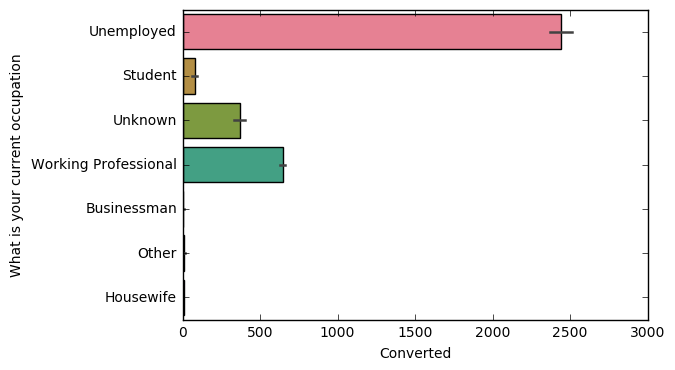

In [54]:
#Plotting barplot after creating new category
sns.barplot(y="What is your current occupation",x="Converted", palette='husl', data=leads_df, estimator=np.sum)

### `Country`

In [55]:
# Creating a new category consisting on NULL/Select values for the field Country

leads_df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
Germany                    4
South Africa               4
Nigeria                    4
Canada                     4
Sweden                     3
Philippines                2
Uganda                     2
Netherlands                2
China                      2
Italy                      2
Bangladesh                 2
Asia/Pacific Region        2
Ghana                      2
Belgium                    2
Switzerland                1
Kenya                      1
Denmark                    1
Liberia                    1
Tanzania                   1
Vietnam                    1
Indonesia     

In [56]:
#Getting count of null records
leads_df['Country'].isnull().sum()

2461

In [57]:
#Create new category named Unknown for null values
leads_df['Country'].fillna("India",inplace=True)
leads_df['Country'] = leads_df['Country'].apply(lambda x: 'India' if x=='India' else 'Outside India')
leads_df['Country'].value_counts()

India            8953
Outside India     287
Name: Country, dtype: int64

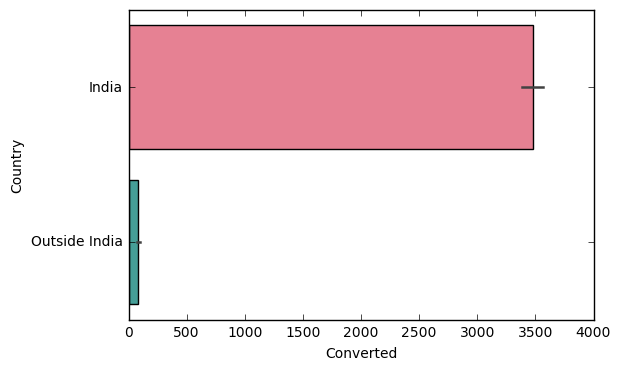

In [58]:
#Plotting barplot after creating new category
sns.barplot(y="Country",x="Converted", palette='husl', data=leads_df, estimator=np.sum)

In [59]:
#checking null values percentage in each rows

round(leads_df.isnull().sum()/len(leads_df.index)*100,2).sort_values(ascending=False)

TotalVisits                               1.48
Page Views Per Visit                      1.48
Last Activity                             1.11
Lead Source                               0.39
Last Notable Activity                     0.00
Specialization                            0.00
Lead Origin                               0.00
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
Total Time Spent on Website               0.00
Country                                   0.00
What is your current occupation           0.00
A free copy of Mastering The Interview    0.00
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
Tags                                      0.00
City         

### `TotalVisits`

In [60]:
#Getting count of null records
leads_df['TotalVisits'].isnull().sum()

137

In [61]:
#Replacing median values wiht null values
leads_df['TotalVisits'].replace(np.NaN, leads_df['TotalVisits'].median(), inplace =True)

In [62]:
#Getting count of null records
leads_df['TotalVisits'].isnull().sum()

0

### `Page Views Per Visit`

In [63]:
#Getting count of null records
leads_df['Page Views Per Visit'].isnull().sum()

137

In [64]:
#Replacing median values wiht null values
leads_df['Page Views Per Visit'].replace(np.NaN, leads_df['Page Views Per Visit'].median(), inplace =True)

In [65]:
#Getting count of null records
leads_df['Page Views Per Visit'].isnull().sum()

0

In [66]:
#checking null values percentage in each rows

round(leads_df.isnull().sum()/len(leads_df.index)*100,2).sort_values(ascending=False)

Last Activity                             1.11
Lead Source                               0.39
Last Notable Activity                     0.00
Specialization                            0.00
Lead Origin                               0.00
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               0.00
Total Time Spent on Website               0.00
Page Views Per Visit                      0.00
Country                                   0.00
What is your current occupation           0.00
A free copy of Mastering The Interview    0.00
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
Tags                                      0.00
City         

### `Last Activity`

In [67]:
# Creating a new category consisting on NULL/Select values for the field Country

leads_df['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [68]:
#Getting count of null records
leads_df['Last Activity'].isnull().sum()

103

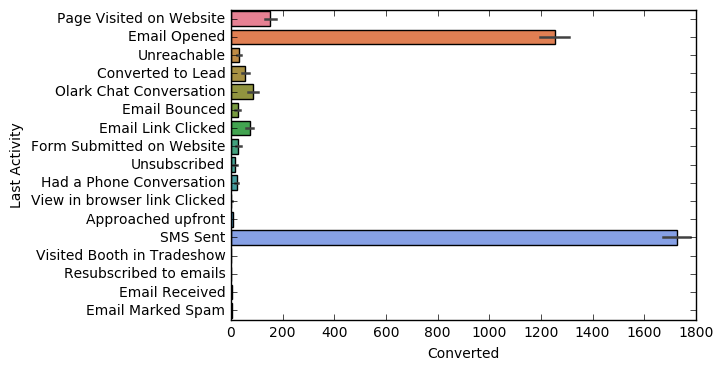

In [69]:
#Plotting barplot after creating new category
sns.barplot(y="Last Activity",x="Converted", palette='husl', data=leads_df, estimator=np.sum)

In [70]:
#replacing Nan Values and combining low frequency values

leads_df['Last Activity'] = leads_df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [71]:
#Create new category named Unknown for null values
leads_df['Last Activity'].fillna("Unknown",inplace=True)
leads_df['Last Activity'].value_counts()

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Others                        205
Form Submitted on Website     116
Unknown                       103
Name: Last Activity, dtype: int64

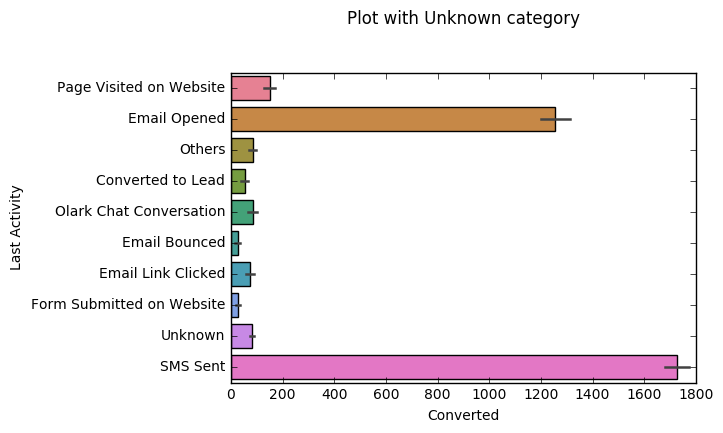

In [72]:
#Plotting barplot after creating new category
sns.barplot(y="Last Activity",x="Converted", palette='husl', data=leads_df, estimator=np.sum)
plt.title('Plot with Unknown category\n\n')

In [73]:
#checking null values percentage in each rows

round(leads_df.isnull().sum()/len(leads_df.index)*100,2).sort_values(ascending=False)

Lead Source                               0.39
Last Notable Activity                     0.00
Specialization                            0.00
Lead Origin                               0.00
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               0.00
Total Time Spent on Website               0.00
Page Views Per Visit                      0.00
Last Activity                             0.00
Country                                   0.00
What is your current occupation           0.00
A free copy of Mastering The Interview    0.00
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
Tags                                      0.00
City         

### `Lead Source`

In [74]:
# Creating a new category consisting on NULL/Select values for the field What is your current occupation

leads_df['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
Pay per Click Ads       1
testone                 1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
youtubechannel          1
Name: Lead Source, dtype: int64

In [75]:
#Getting count of null records
leads_df['Lead Source'].isnull().sum()

36

In [76]:
# removing rows where a particular column has high missing values because the column cannot be removed because of its importance
leads_df = leads_df[~pd.isnull(leads_df['Lead Source'])]
leads_df.shape

(9204, 25)

In [77]:
#replacing Nan Values and combining low frequency values
leads_df['Lead Source'] = leads_df['Lead Source'].replace('google','Google')
leads_df['Lead Source'] = leads_df['Lead Source'].replace('Facebook','Social Media')
leads_df['Lead Source'] = leads_df['Lead Source'].replace(['bing','Click2call','Press_Release','Live Chat',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')                                                   

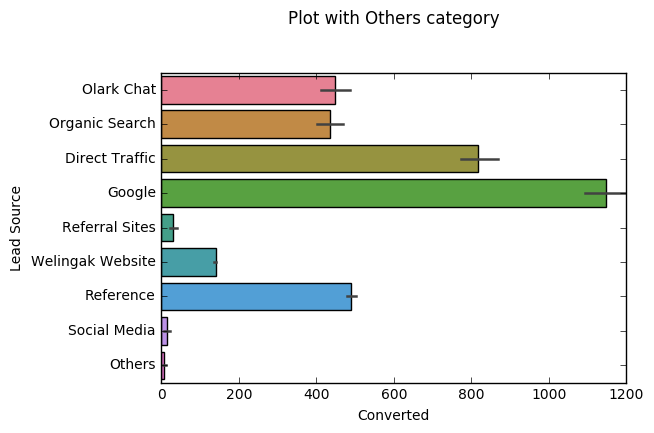

In [78]:
#Plotting barplot after creating new category
sns.barplot(y="Lead Source",x="Converted", palette='husl', data=leads_df, estimator=np.sum)
plt.title('Plot with Others category\n\n')

In [79]:
#checking null values percentage in each rows

round(leads_df.isnull().sum()/len(leads_df.index)*100,2).sort_values(ascending=False)

Last Notable Activity                     0.0
Specialization                            0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Country                                   0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
Tags                                      0.0
City                              

In [80]:
#checking null records counts

leads_df.isnull().sum()

Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Do Not Call                               0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Country                                   0
Specialization                            0
What is your current occupation           0
Search                                    0
Newspaper Article                         0
X Education Forums                        0
Newspaper                                 0
Digital Advertisement                     0
Through Recommendations                   0
Tags                                      0
City                                      0
Asymmetrique Activity Index               0
Asymmetrique Profile Index      

## Checking for Outliers

In [81]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
leads_df.describe(percentiles=[.25,.5,.75,.90,.95,.99]).T

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
Lead Number,9204.0,617194.608648,23418.830233,579533.0,596484.5,615479.0,637409.25,650513.1,655405.85,659599.46,660737.0
Converted,9204.0,0.383746,0.486324,0.0,0.0,0.0,1.00,1.0,1.00,1.00,1.0
TotalVisits,9204.0,3.449587,4.824662,0.0,1.0,3.0,5.00,7.0,10.00,17.00,251.0
Total Time Spent on Website,9204.0,489.005541,547.980340,0.0,14.0,250.0,938.00,1380.0,1562.00,1839.97,2272.0
Page Views Per Visit,9204.0,2.364923,2.145999,0.0,1.0,2.0,3.00,5.0,6.00,9.00,55.0


In [82]:
#Numerical columns
numeric_variables = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
print(numeric_variables)

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


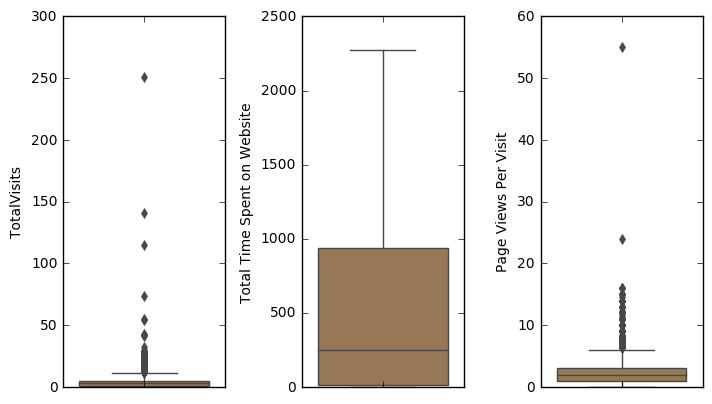

In [83]:
#Plotting boxplot

numeric_variables = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

#Function to plot the distribution plot of the numeric variable list
def boxplot(var_list):
    plt.figure(figsize=(12,8))
    for var in var_list:
        plt.subplot(2,5,var_list.index(var)+1)
        #plt.boxplot(country[var])
        sns.boxplot(y=var,palette='cubehelix', data=leads_df)
    # Automatically adjust subplot params so that the subplotS fits in to the figure area.
    plt.tight_layout()
    # display the plot
    plt.show()
    
boxplot(numeric_variables)    

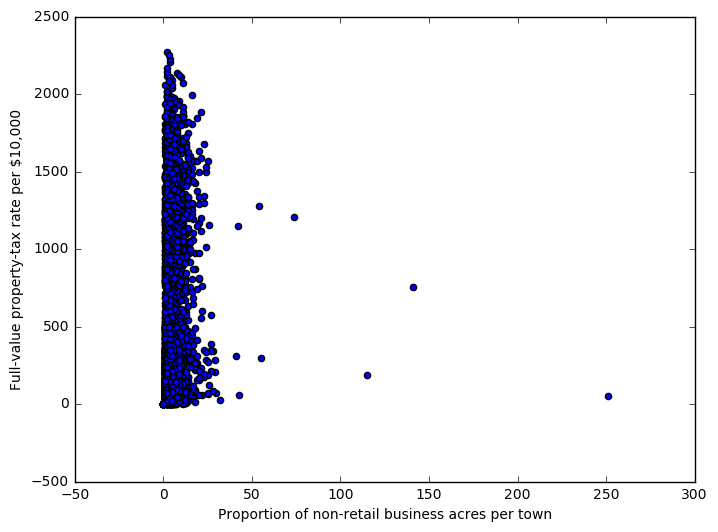

In [84]:
#Scatter Plot

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(leads_df['TotalVisits'], leads_df['Total Time Spent on Website'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

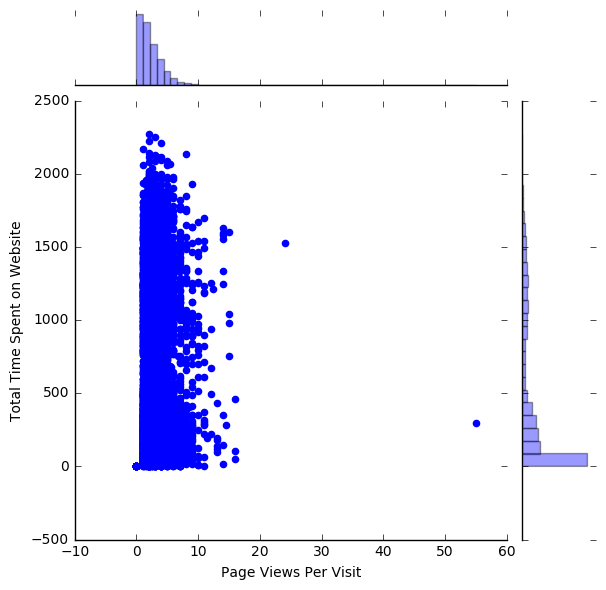

In [85]:
#Scatter plot
sns.jointplot(leads_df['Page Views Per Visit'],leads_df['Total Time Spent on Website'], color="b")
plt.show()

## Remove Outliers Using Inter Quartile Distance

In [86]:
#Using Interquartile range to remove outliers 

Q1 = leads_df['TotalVisits'].quantile(0.05)
Q3 = leads_df['TotalVisits'].quantile(0.95)
IQR = Q3 - Q1
leads_df=leads_df.loc[(leads_df['TotalVisits'] >= Q1 - 1.5*IQR) & (leads_df['TotalVisits'] <= Q3 + 1.4*IQR)]

Q1 = leads_df['Page Views Per Visit'].quantile(0.05)
Q3 = leads_df['Page Views Per Visit'].quantile(0.95)
IQR = Q3 - Q1
leads_df=leads_df.loc[(leads_df['Page Views Per Visit'] >= Q1 - 1.5*IQR) & (leads_df['Page Views Per Visit'] <= Q3 + 1.5*IQR)]

leads_df.shape

(9173, 25)

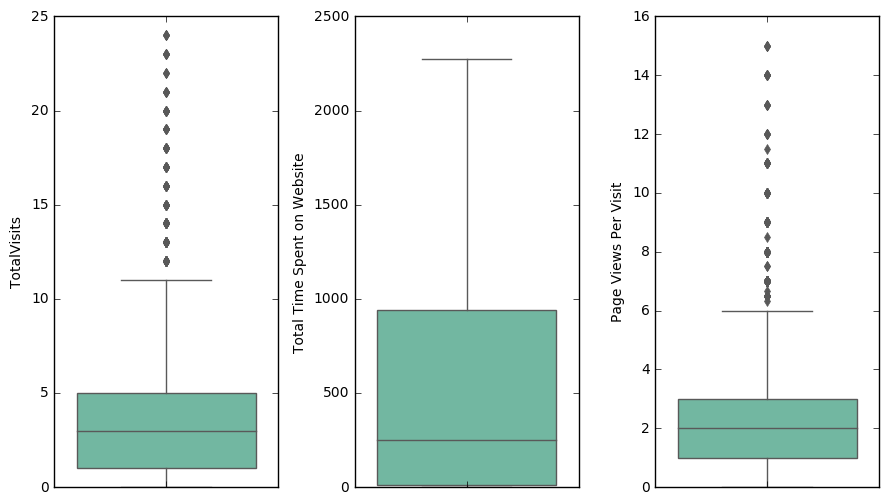

In [87]:
#Function to plot the distribution plot of the numeric variable list
def boxplot(var_list):
    plt.figure(figsize=(15,10))
    for var in var_list:
        plt.subplot(2,5,var_list.index(var)+1)
        #plt.boxplot(country[var])
        sns.boxplot(y=var,palette='BuGn_r', data=leads_df)
    # Automatically adjust subplot params so that the subplotS fits in to the figure area.
    plt.tight_layout()
    # display the plot
    plt.show()
    
boxplot(numeric_variables)    

## Converting some binary variables (Yes/No) to 1/0

In [88]:
# List of variables to map

varlist =  ['Search','Do Not Email', 'Do Not Call', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads_df[varlist] = leads_df[varlist].apply(binary_map)
leads_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Unknown,Unemployed,0,0,0,0,0,0,Interested in other courses,Unknown,02.Medium,02.Medium,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Unknown,Unemployed,0,0,0,0,0,0,Ringing,Unknown,02.Medium,02.Medium,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,0,0,0,0,0,0,Will revert after reading the email,Mumbai,02.Medium,01.High,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Others,India,Media and Advertising,Unemployed,0,0,0,0,0,0,Ringing,Mumbai,02.Medium,01.High,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Unknown,Unemployed,0,0,0,0,0,0,Will revert after reading the email,Mumbai,02.Medium,01.High,0,Modified


## Bivairate Analysis

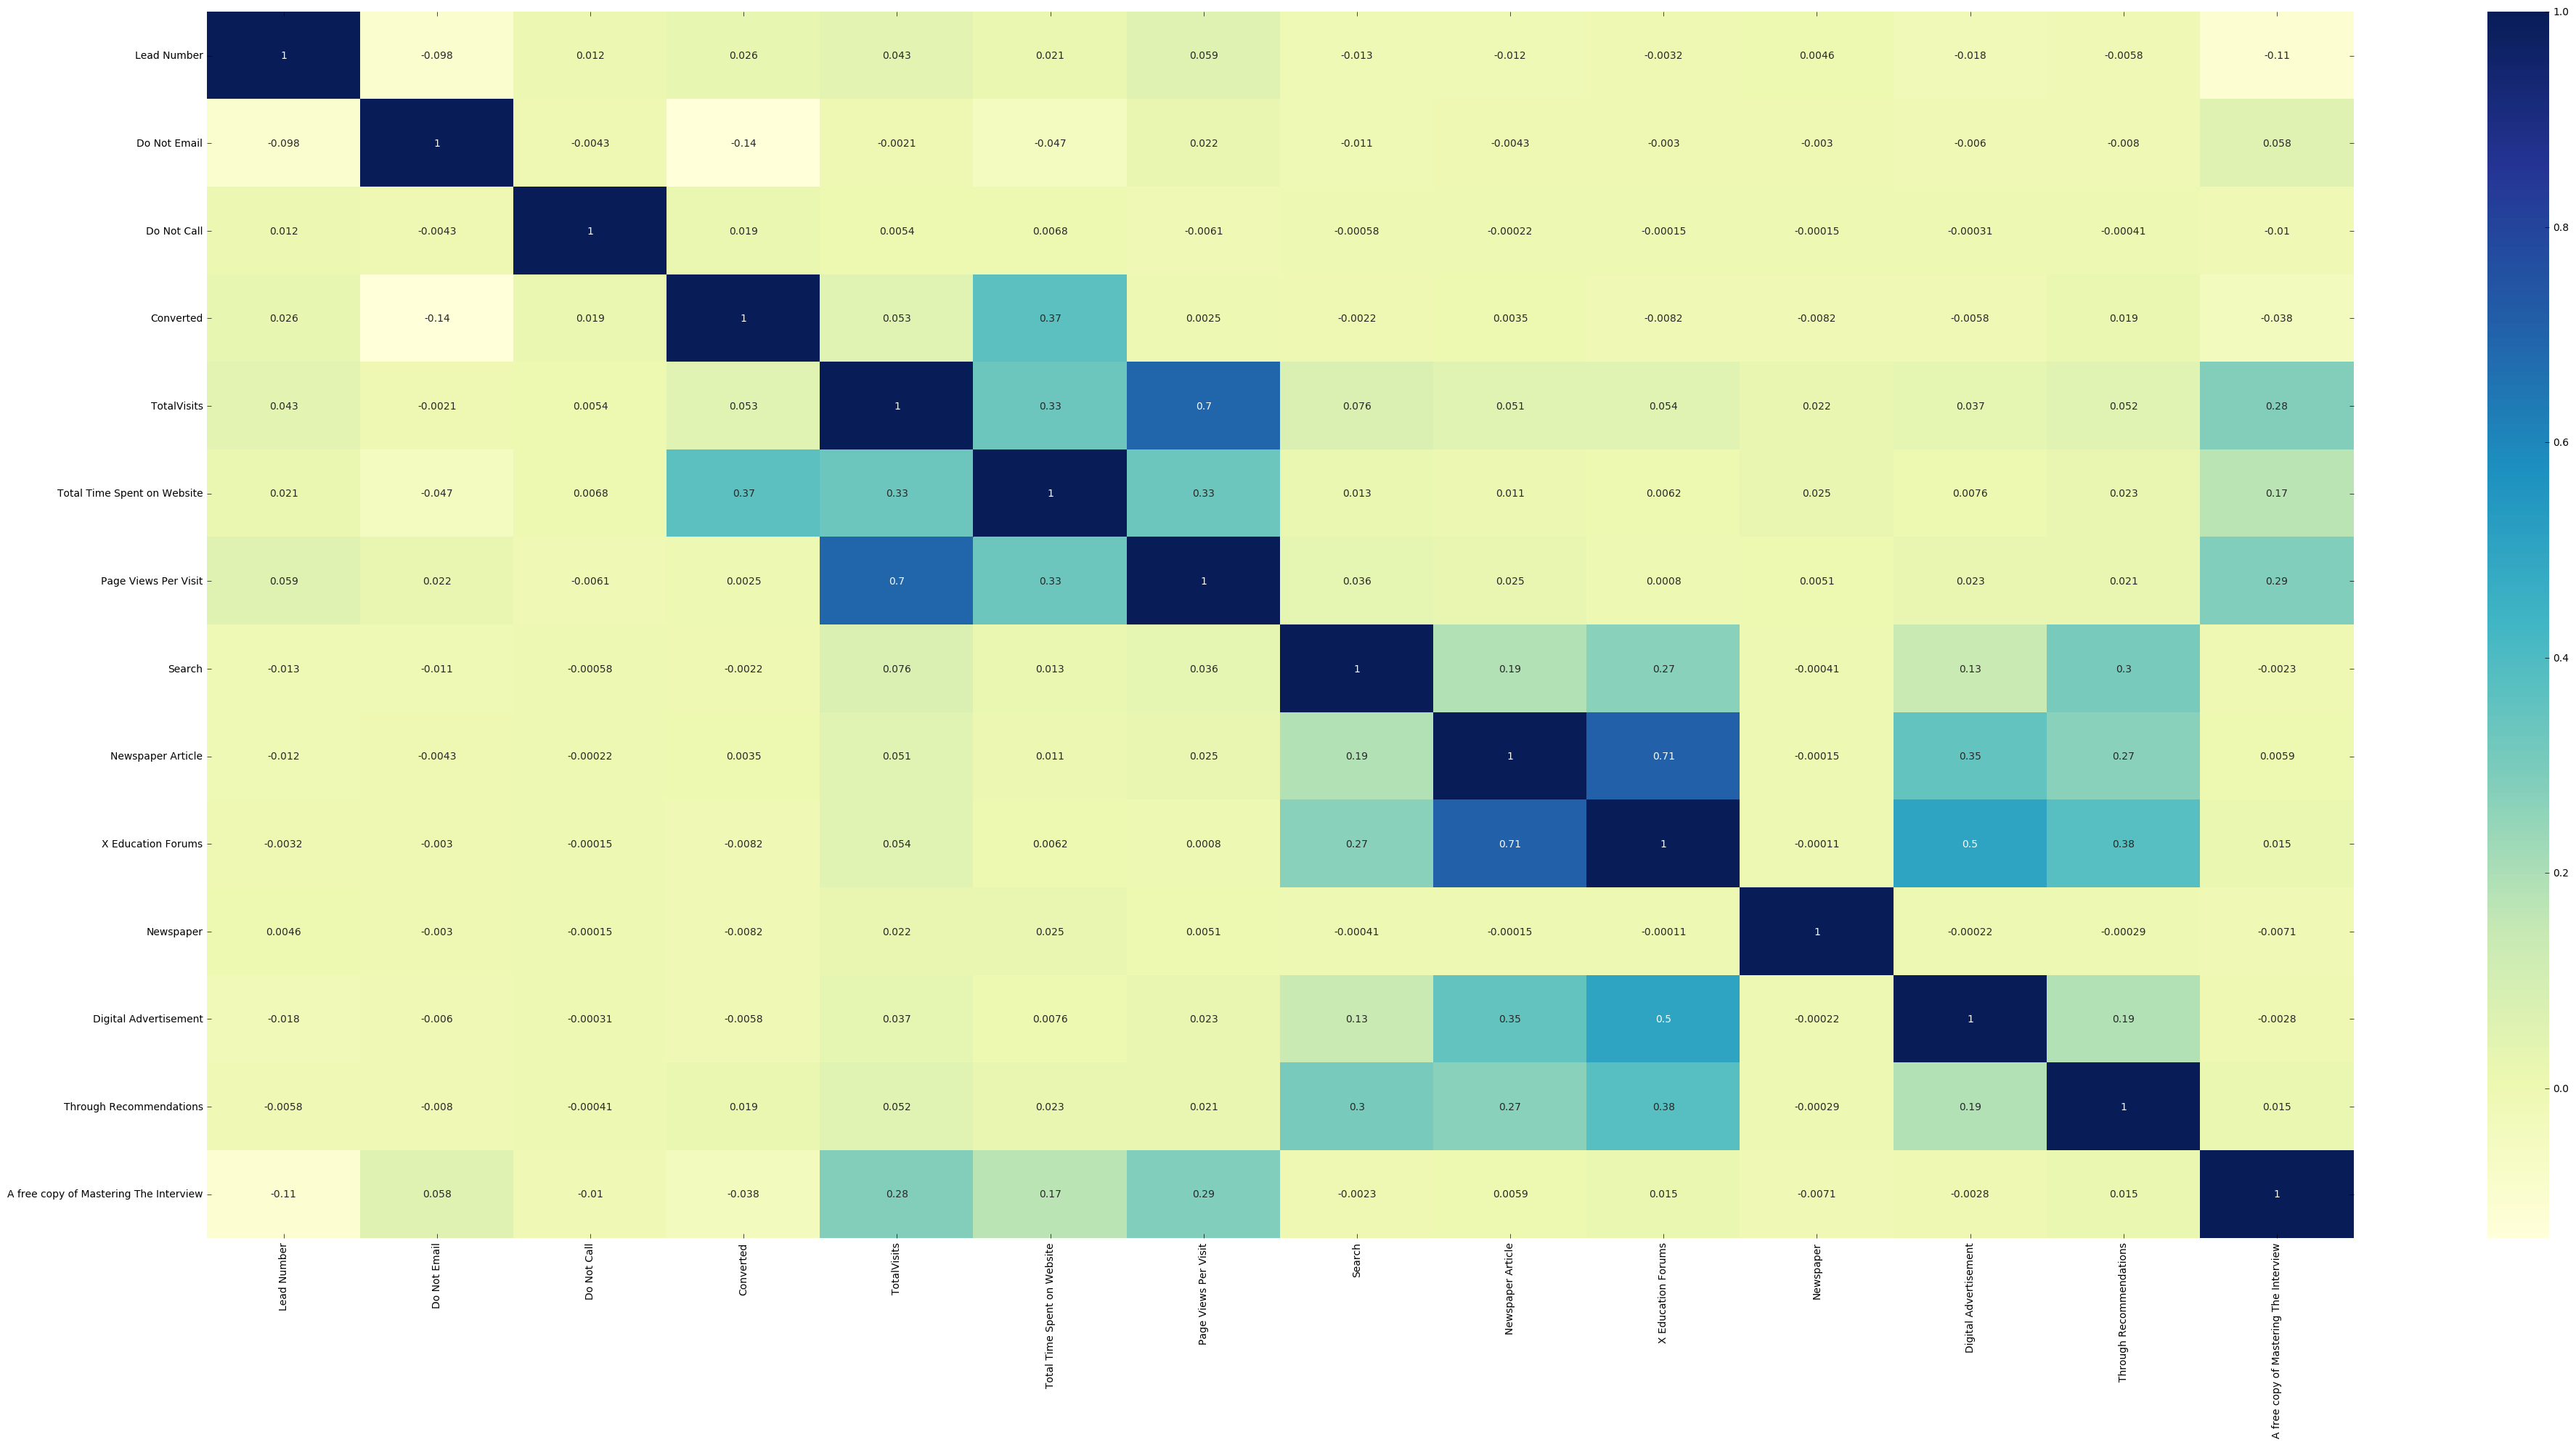

In [89]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(40,20))

cor = leads_df.corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

### For categorical variables with multiple levels, creating dummy features

In [90]:
    # Creating dummy variables for the remaining categorical variables and 
# dropping the level called 'Unknown' which represents null/select values.

# Creating dummy variables for the variable 'Lead Origin'
ml = pd.get_dummies(leads_df['Lead Origin'], prefix='Lead Origin')
#Adding the results to the master dataframe
leads_df = pd.concat([leads_df,ml], axis=1)
#--------------------------------------------------------------------------------------

# Creating dummy variables for the variable 'Lead Source'
ml = pd.get_dummies(leads_df['Lead Source'], prefix='Lead Source')
#Adding the results to the master dataframe
leads_df = pd.concat([leads_df,ml], axis=1)
#--------------------------------------------------------------------------------------

# Creating dummy variables for the variable 'Country'
ml = pd.get_dummies(leads_df['Country'], prefix='Country')
#Adding the results to the master dataframe
leads_df = pd.concat([leads_df,ml], axis=1)
#--------------------------------------------------------------------------------------

# Creating dummy variables for the variable 'Asymmetrique Profile Index'
ml = pd.get_dummies(leads_df['Asymmetrique Profile Index'], prefix='Asymmetrique Profile Index')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Asymmetrique Profile Index_Unknown'], 1)
#Adding the results to the master dataframe
leads_df = pd.concat([leads_df,ml1], axis=1)
#--------------------------------------------------------------------------------------

# Creating dummy variables for the variable 'Asymmetrique Activity Index'
ml = pd.get_dummies(leads_df['Asymmetrique Activity Index'], prefix='Asymmetrique Activity Index')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Asymmetrique Activity Index_Unknown'], 1)
#Adding the results to the master dataframe
leads_df = pd.concat([leads_df,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'Tags'
ml = pd.get_dummies(leads_df['Tags'], prefix='Tags')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Tags_Unknown'], 1)
#Adding the results to the master dataframe
leads_df = pd.concat([leads_df,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'What is your current occupation'
ml = pd.get_dummies(leads_df['What is your current occupation'], prefix='What is your current occupation')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['What is your current occupation_Unknown'], 1)
#Adding the results to the master dataframe
leads_df = pd.concat([leads_df,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'Specialization'
ml = pd.get_dummies(leads_df['Specialization'], prefix='Specialization')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Specialization_Unknown'], 1)
#Adding the results to the master dataframe
leads_df = pd.concat([leads_df,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'City'
ml = pd.get_dummies(leads_df['City'], prefix='City')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['City_Unknown'], 1)
#Adding the results to the master dataframe
leads_df = pd.concat([leads_df,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'Last Activity'
ml = pd.get_dummies(leads_df['Last Activity'], prefix='Last Activity')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['Last Activity_Unknown'], 1)
#Adding the results to the master dataframe
leads_df = pd.concat([leads_df,ml1], axis=1)
#--------------------------------------------------------------------------------------
# Creating dummy variables for the variable 'Last Activity'
ml = pd.get_dummies(leads_df['Last Notable Activity'], prefix='Last Notable Activity')
#Adding the results to the master dataframe
leads_df = pd.concat([leads_df,ml], axis=1)
#--------------------------------------------------------------------------------------


leads_df.shape

(9173, 100)

In [91]:
#diplay top 5 rows
leads_df.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,Asymmetrique Activity Index,Asymmetrique Profile Index,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Country_India,Country_Outside India,Asymmetrique Profile Index_01.High,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,Asymmetrique Activity Index_01.High,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Unknown,Unemployed,0,0,0,0,0,0,Interested in other courses,Unknown,02.Medium,02.Medium,0,Modified,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Unknown,Unemployed,0,0,0,0,0,0,Ringing,Unknown,02.Medium,02.Medium,0,Email Opened,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,0,0,0,0,0,0,Will revert after reading the email,Mumbai,02.Medium,01.High,1,Email Opened,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0

### Dropping original columns after creating dummy values

In [92]:
# We have created dummies for the below variables, so we can drop them
leads_df = leads_df.drop(['Last Notable Activity','Lead Source','Lead Origin','Country','Asymmetrique Profile Index','Asymmetrique Activity Index','Tags','What is your current occupation', 'Specialization', 'City','Last Activity'], 1)
leads_df.shape

(9173, 89)

In [93]:
#Looking at top 5 records after creating dummy variables
leads_df.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Country_India,Country_Outside India,Asymmetrique Profile Index_01.High,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,Asymmetrique Activity Index_01.High,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,660728,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,660727,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,660719,0,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0

In [94]:
# Ensuring there are no categorical columns left in the dataframe
cols = leads_df.columns
num_cols = leads_df._get_numeric_data().columns
list(set(cols) - set(num_cols))

[]

In [95]:
# Creating a copy of this origial variable in case if needed later on
original_leads = leads_df.copy()
print(original_leads.shape)
print(leads_df.shape)

(9173, 89)
(9173, 89)


### `Lead Number`

In [96]:
leads_df = leads_df.drop('Lead Number', axis=1)

leads_df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Country_India,Country_Outside India,Asymmetrique Profile Index_01.High,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,Asymmetrique Activity Index_01.High,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,1,2.0,1428,1.0,0,

## Test-Train Split

In [97]:
# Putting response variable to y
y = leads_df['Converted']

y.head()

X=leads_df.drop('Converted', axis=1)

In [98]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [99]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6421 entries, 1841 to 5680
Data columns (total 87 columns):
Do Not Email                                            6421 non-null int64
Do Not Call                                             6421 non-null int64
TotalVisits                                             6421 non-null float64
Total Time Spent on Website                             6421 non-null int64
Page Views Per Visit                                    6421 non-null float64
Search                                                  6421 non-null int64
Newspaper Article                                       6421 non-null int64
X Education Forums                                      6421 non-null int64
Newspaper                                               6421 non-null int64
Digital Advertisement                                   6421 non-null int64
Through Recommendations                                 6421 non-null int64
A free copy of Mastering The Interview            

## Feature Scaling

In [100]:
#scaling numeric columns

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Country_India,Country_Outside India,Asymmetrique Profile Index_01.High,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,Asymmetrique Activity Index_01.High,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1841,0,0,-0.103450,-0.373624,0.318756,0,0,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1761,0,0,-0.411258,0.193389,-0.667581,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3581,1,0,-1.026874,-0.893080,-1.160749,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7363,0,0,-1.026874,-0.893080,-1.160749,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.

### Checking the Lead Conversion Rate

In [101]:
### Checking the Lead Conversion Rate
converted = (sum(leads_df['Converted'])/len(leads_df['Converted'].index))*100
converted

38.41709364439115

### Model Building using Stats Model & RFE:

In [102]:
import statsmodels.api as sm

In [103]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [104]:
rfe.support_

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False,  True,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False])

In [105]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 64),
 ('TotalVisits', False, 48),
 ('Total Time Spent on Website', False, 7),
 ('Page Views Per Visit', False, 47),
 ('Search', False, 26),
 ('Newspaper Article', False, 73),
 ('X Education Forums', False, 72),
 ('Newspaper', False, 57),
 ('Digital Advertisement', False, 63),
 ('Through Recommendations', False, 65),
 ('A free copy of Mastering The Interview', False, 59),
 ('Lead Origin_API', False, 31),
 ('Lead Origin_Landing Page Submission', False, 29),
 ('Lead Origin_Lead Add Form', False, 22),
 ('Lead Origin_Lead Import', False, 28),
 ('Lead Source_Direct Traffic', False, 10),
 ('Lead Source_Google', False, 12),
 ('Lead Source_Olark Chat', False, 32),
 ('Lead Source_Organic Search', False, 13),
 ('Lead Source_Others', False, 56),
 ('Lead Source_Reference', False, 23),
 ('Lead Source_Referral Sites', False, 11),
 ('Lead Source_Social Media', False, 9),
 ('Lead Source_Welingak Website', True, 1),
 ('Country_India', False, 24),
 ('Co

In [106]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Lead Source_Welingak Website', 'Asymmetrique Activity Index_03.Low', 'Tags_Closed by Horizzon', 'Tags_Interested in other courses', 'Tags_Lost to EINS', 'Tags_Other_Tags', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'What is your current occupation_Student', 'What is your current occupation_Unemployed', 'What is your current occupation_Working Professional', 'Last Activity_SMS Sent', 'Last Notable Activity_Modified', 'Last Notable Activity_Olark Chat Conversation'], dtype='object')

In [107]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'A free copy of Mastering The Interview', 'Lead Origin_API', 'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import', 'Lead Source_Direct Traffic', 'Lead Source_Google', 'Lead Source_Olark Chat', 'Lead Source_Organic Search', 'Lead Source_Others', 'Lead Source_Reference', 'Lead Source_Referral Sites', 'Lead Source_Social Media', 'Country_India', 'Country_Outside India', 'Asymmetrique Profile Index_01.High', 'Asymmetrique Profile Index_02.Medium', 'Asymmetrique Profile Index_03.Low', 'Asymmetrique Activity Index_01.High', 'Asymmetrique Activity Index_02.Medium', 'Tags_Busy', 'What is your current occupation_Businessman', 'What is your current occupation_Housewife', 'What is your current occupation_Other',
       'Specialization_Banking, Invest

#### As we can see that RFE did not support dummy variables that are of 'Others' category and these columns got dropped automatically (Expected)

In [108]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6421
Model:                            GLM   Df Residuals:                     6405
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -1295.4
Date:                Sat, 30 May 2020   Deviance:                       2590.7
Time:                        23:11:07   Pearson chi2:                 9.78e+03
No. Iterations:                    10                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.9108      0.096    -20.000      0.000        -2.098    -1.724
Do Not Email                                            -1.1887      0.244     -4.865      0.000        -1.668    -0.710
Lead Source_Welingak Website                             3.6802      1.024      3.593      0.000         1.673     5.688
Asymmetrique Activity Index_03.Low                      -1.9138      0.426     -4.497      0.000        -2.748    -1.080
Tags_Closed by Horizzon                                  5.4309      0.727      7.472      0.000         4.006     6.856
Tags_Interested in other courses                        -3.2232      0.364     -8.862      0.000        -3.936    -2.510
Tags_Lost to EINS                                        5.2771      0.616      8.569      0.000         4.070     6.484
Tags_Other_Tags                                         -3.8662      0.224    -17.224      0.000        -4.306    -3.426
Tags_Ringing                                            -4.7937      0.244    -19.630      0.000        -5.272    -4.315
Tags_Will revert after reading the email                 3.0832      0.195     15.782      0.000         2.700     3.466
What is your current occupation_Student                  1.9866      0.529      3.758      0.000         0.951     3.023
What is your current occupation_Unemployed               2.2026      0.127     17.288      0.000         1.953     2.452
What is your current occupation_Working Professional     2.9506      0.404      7.302      0.000         2.159     3.743
Last Activity_SMS Sent                                   1.9937      0.116     17.257      0.000         1.767     2.220
Last Notable Activity_Modified                          -1.3489      0.123    -11.002      0.000        -1.589    -1.109
Last Notable Activity_Olark Chat Conversation           -1.2658      0.440     -2.875      0.004        -2.129    -0.403
========================================================================================================================
"""

#### Since all the p-values are less we can check the Variance Inflation Factor to see if there is any correlation between the variables

In [109]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [110]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,6.48
8,Tags_Will revert after reading the email,3.36
6,Tags_Other_Tags,2.56
7,Tags_Ringing,2.29
11,What is your current occupation_Working Profes...,2.08
4,Tags_Interested in other courses,1.56
12,Last Activity_SMS Sent,1.52
13,Last Notable Activity_Modified,1.45
3,Tags_Closed by Horizzon,1.42
9,What is your current occupation_Student,1.23


In [111]:
#dropping column with high vif

col = col.drop('What is your current occupation_Unemployed',1)

In [112]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6421
Model:                            GLM   Df Residuals:                     6406
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -1455.1
Date:                Sat, 30 May 2020   Deviance:                       2910.1
Time:                        23:11:08   Pearson chi2:                 1.01e+04
No. Iterations:                    10                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1713      0.073    -16.011      0.000        -1.315    -1.028
Do Not Email                                            -0.9009      0.224     -4.029      0.000        -1.339    -0.463
Lead Source_Welingak Website                             5.2117      1.025      5.082      0.000         3.202     7.221
Asymmetrique Activity Index_03.Low                      -1.5556      0.426     -3.651      0.000        -2.391    -0.720
Tags_Closed by Horizzon                                  6.9122      0.720      9.598      0.000         5.501     8.324
Tags_Interested in other courses                        -1.7175      0.356     -4.830      0.000        -2.414    -1.021
Tags_Lost to EINS                                        5.9058      0.605      9.755      0.000         4.719     7.092
Tags_Other_Tags                                         -2.4317      0.208    -11.718      0.000        -2.838    -2.025
Tags_Ringing                                            -3.3501      0.224    -14.938      0.000        -3.790    -2.911
Tags_Will revert after reading the email                 4.4848      0.181     24.811      0.000         4.130     4.839
What is your current occupation_Student                  0.1776      0.543      0.327      0.744        -0.887     1.242
What is your current occupation_Working Professional     1.1646      0.402      2.895      0.004         0.376     1.953
Last Activity_SMS Sent                                   2.0162      0.105     19.203      0.000         1.810     2.222
Last Notable Activity_Modified                          -1.6387      0.117    -14.009      0.000        -1.868    -1.409
Last Notable Activity_Olark Chat Conversation           -1.4346      0.414     -3.464      0.001        -2.246    -0.623
========================================================================================================================
"""

In [113]:
#dropping column with high p-value

col = col.drop('What is your current occupation_Student',1)

In [114]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6421
Model:                            GLM   Df Residuals:                     6407
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -1455.1
Date:                Sat, 30 May 2020   Deviance:                       2910.3
Time:                        23:11:09   Pearson chi2:                 1.00e+04
No. Iterations:                    10                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1706      0.073    -16.011      0.000        -1.314    -1.027
Do Not Email                                            -0.9007      0.224     -4.027      0.000        -1.339    -0.462
Lead Source_Welingak Website                             5.2110      1.025      5.082      0.000         3.201     7.221
Asymmetrique Activity Index_03.Low                      -1.5543      0.425     -3.653      0.000        -2.388    -0.720
Tags_Closed by Horizzon                                  6.9135      0.720      9.600      0.000         5.502     8.325
Tags_Interested in other courses                        -1.7158      0.356     -4.826      0.000        -2.413    -1.019
Tags_Lost to EINS                                        5.9097      0.605      9.764      0.000         4.723     7.096
Tags_Other_Tags                                         -2.4227      0.205    -11.790      0.000        -2.825    -2.020
Tags_Ringing                                            -3.3497      0.224    -14.937      0.000        -3.789    -2.910
Tags_Will revert after reading the email                 4.4916      0.180     24.994      0.000         4.139     4.844
What is your current occupation_Working Professional     1.1592      0.402      2.882      0.004         0.371     1.948
Last Activity_SMS Sent                                   2.0149      0.105     19.208      0.000         1.809     2.220
Last Notable Activity_Modified                          -1.6384      0.117    -14.008      0.000        -1.868    -1.409
Last Notable Activity_Olark Chat Conversation           -1.4351      0.414     -3.463      0.001        -2.247    -0.623
========================================================================================================================
"""

In [115]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Tags_Will revert after reading the email,1.54
11,Last Notable Activity_Modified,1.44
10,Last Activity_SMS Sent,1.42
9,What is your current occupation_Working Profes...,1.32
6,Tags_Other_Tags,1.18
0,Do Not Email,1.12
4,Tags_Interested in other courses,1.12
3,Tags_Closed by Horizzon,1.11
7,Tags_Ringing,1.10
2,Asymmetrique Activity Index_03.Low,1.07


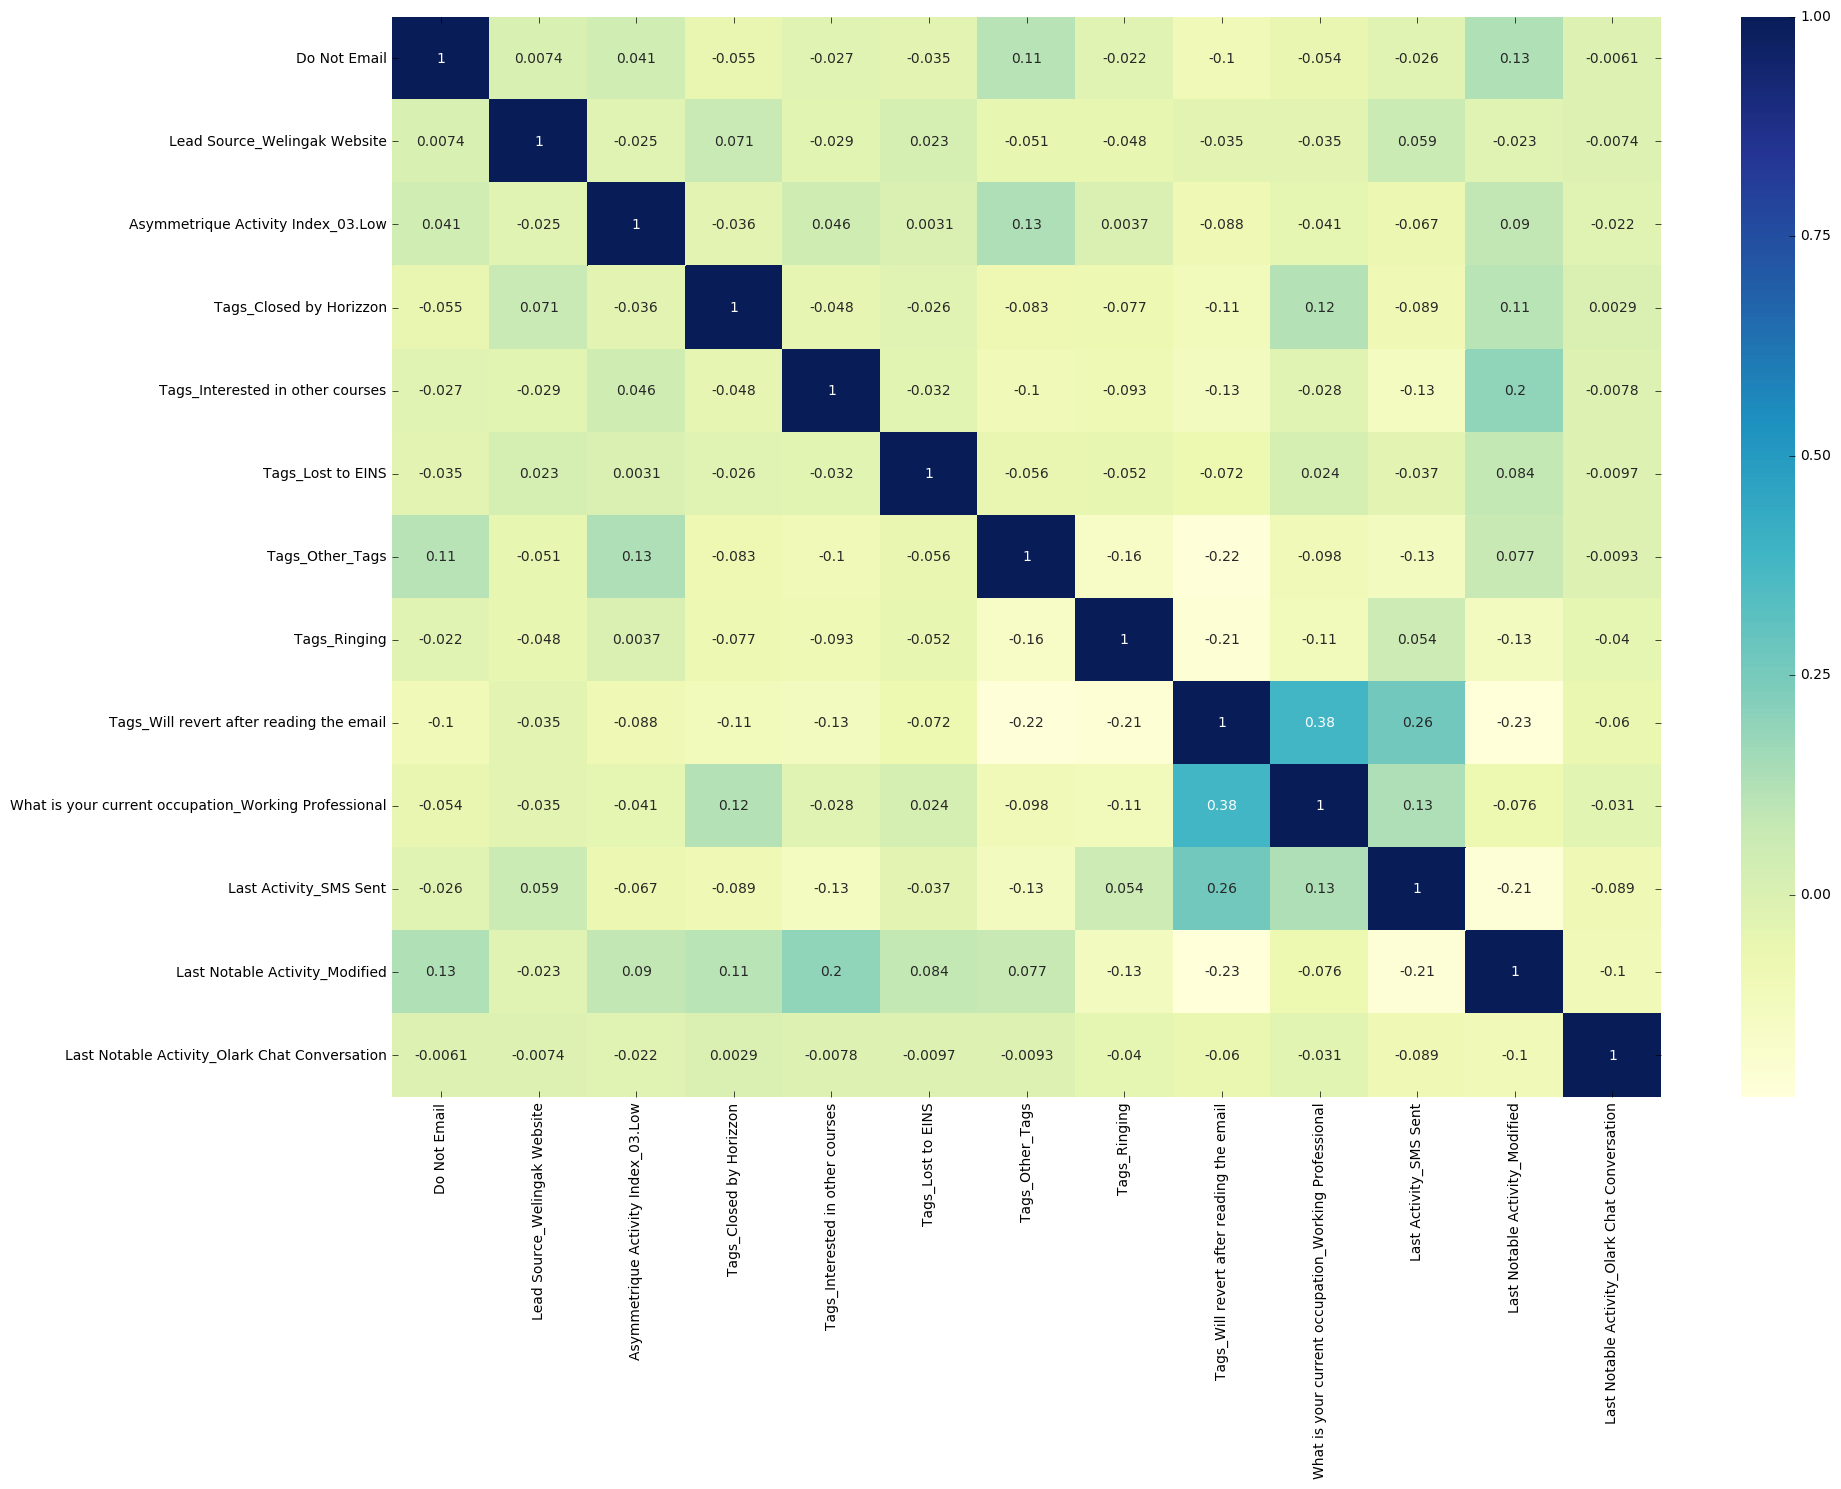

In [116]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(20,15), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

So the Values all seem to be in order so now, Moving on to derive the Probabilities, Lead Score, Predictions on Train Data:

In [117]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

array([0.00211063, 0.99520731, 0.02390165, 0.23675162, 0.01072077,
       0.05282946, 0.98377066, 0.01076885, 0.00531632, 0.9984914 ])

In [118]:
y_train_pred = y_train_pred.reshape(-1)
y_train_pred[:10]

array([0.00211063, 0.99520731, 0.02390165, 0.23675162, 0.01072077,
       0.05282946, 0.98377066, 0.01076885, 0.00531632, 0.9984914 ])

In [119]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.002111,1841
1,1,0.995207,1761
2,0,0.023902,3581
3,0,0.236752,7363
4,0,0.010721,499


In [120]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.002111,1841,0
1,1,0.995207,1761,1
2,0,0.023902,3581,0
3,0,0.236752,7363,0
4,0,0.010721,499,0


In [121]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3823  143]
 [ 363 2092]]


In [122]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.921196075377667


### Our latest model have the following features:
 - <font color = blue>All variables have p-value < 0.05. </font>
 - <font color = blue>All the features have very low VIF values, meaning, there is hardly any muliticollinearity among the features. This is also evident from the heat map.</font>
 - <font color = blue>The overall accuracy of `0.92119` at a probability threshold of 0.05 is also very acceptable.</font>
 
### So we need not drop any more variables and we can proceed with making predictions using this model only

### Calculating Metrics beyond Accuracy

In [123]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [124]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8521384928716904

In [125]:
# Let us calculate specificity
TN / float(TN+FP)

0.9639435199193142

In [126]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.03605648008068583


In [127]:
# positive predictive value 
print (TP / float(TP+FP))

0.9360178970917226


In [128]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9132823698041089


### PLOTTING ROC CURVE

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [129]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [130]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

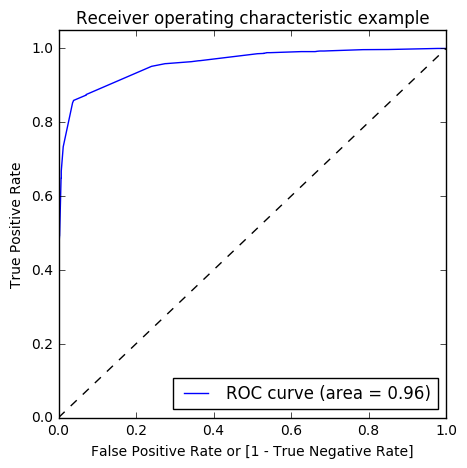

In [131]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Calculating the area under the curve(GINI)

In [132]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [133]:
auc = auc_val(fpr,tpr)
auc

0.9597354498984747

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [134]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.002111,1841,0,1,0,0,0,0,0,0,0,0,0
1,1,0.995207,1761,1,1,1,1,1,1,1,1,1,1,1
2,0,0.023902,3581,0,1,0,0,0,0,0,0,0,0,0
3,0,0.236752,7363,0,1,1,1,0,0,0,0,0,0,0
4,0,0.010721,499,0,1,0,0,0,0,0,0,0,0,0


In [135]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.382339  1.000000  0.000000
0.1   0.1  0.814203  0.958859  0.724660
0.2   0.2  0.833359  0.951527  0.760212
0.3   0.3  0.907647  0.873727  0.928643
0.4   0.4  0.921975  0.857434  0.961926
0.5   0.5  0.921196  0.852138  0.963944
0.6   0.6  0.921352  0.852138  0.964196
0.7   0.7  0.890827  0.733605  0.988149
0.8   0.8  0.890827  0.733605  0.988149
0.9   0.9  0.875720  0.687984  0.991931


### Let's plot accuracy sensitivity and specificity for various probabilities.

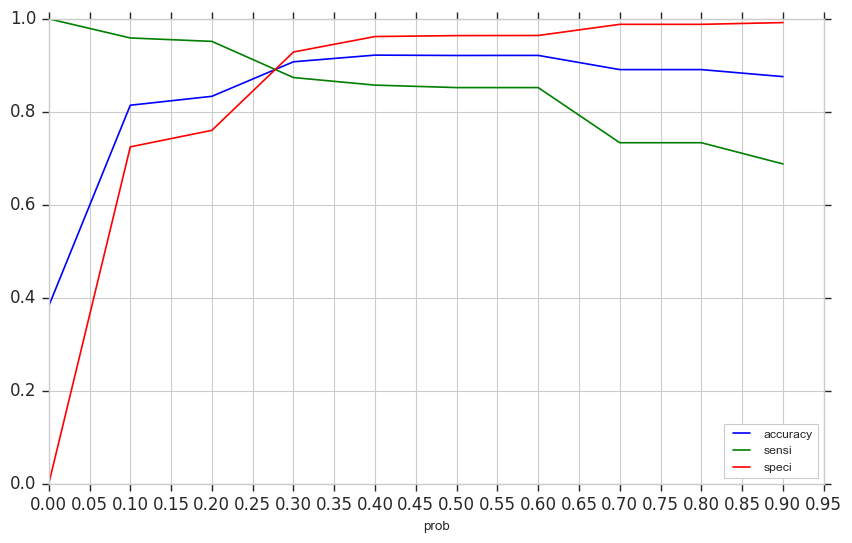

In [136]:

#plt.figure(figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k', frameon='True')
sns.set_style("whitegrid") # white/whitegrid/dark/ticks
sns.set_context("paper") # talk/poster
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(10,6))
# plot x axis limits
plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.show()

From the curve above, 0.28 is the optimum point to take it as a cutoff probability.

In [137]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.28 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.002111,1841,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.995207,1761,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.023902,3581,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.236752,7363,0,1,1,1,0,0,0,0,0,0,0,0
4,0,0.010721,499,0,1,0,0,0,0,0,0,0,0,0,0


In [138]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_predicted,Lead_Score
0,0,0.002111,1841,0,0
1,1,0.995207,1761,1,100
2,0,0.023902,3581,0,2
3,0,0.236752,7363,0,24
4,0,0.010721,499,0,1


In [139]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.9081140009344338

In [140]:
confusion1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
confusion1

array([[3682,  284],
       [ 306, 2149]])

In [141]:
TP = confusion1[1,1] # true positive 
TN = confusion1[0,0] # true negatives
FP = confusion1[0,1] # false positives
FN = confusion1[1,0] # false negatives

In [142]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8753564154786151

In [143]:
# Let us calculate specificity
TN / float(TN+FP)

0.9283913262733232

In [144]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.07160867372667676


In [145]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8832716810521989


In [146]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9232698094282848


## Precision and Recall

In [147]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9360178970917226

In [148]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8521384928716904

In [149]:
from sklearn.metrics import precision_score, recall_score

In [150]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted)

0.8832716810521989

In [151]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8753564154786151

In [152]:
from sklearn.metrics import precision_recall_curve

In [153]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

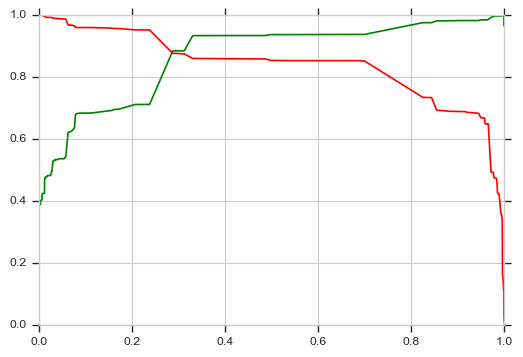

In [154]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Scaling Test data

In [155]:
#scaling numeric columns

scaler = StandardScaler()

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_Welingak Website,Country_India,Country_Outside India,Asymmetrique Profile Index_01.High,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,Asymmetrique Activity Index_01.High,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
5900,0,0,-1.021223,-0.890466,-1.130298,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7164,0,0,-1.021223,-0.890466,-1.130298,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7644,0,0,-0.393410,1.322855,-0.157492,0,0,0,0,0,0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
490,0,0,0.234403,-0.172632,-0.157492,0,0,0,0,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0

In [156]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Lead Source_Welingak Website,Asymmetrique Activity Index_03.Low,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,What is your current occupation_Working Professional,Last Activity_SMS Sent,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
5900,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7164,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7644,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
490,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9031,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [157]:
X_test_sm = sm.add_constant(X_test)

## PREDICTIONS ON TEST SET

In [158]:
y_test_pred = res.predict(X_test_sm)

In [159]:
y_test_pred[:10]

array([0.00211063, 0.00531632, 0.69936564, 0.23675162, 0.97286849,
       0.99520731, 0.9984914 , 0.99629516, 0.05684216, 0.23675162])

In [160]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [161]:
# Let's see the head
y_pred_1.head()

,0
0,0.002111
1,0.005316
2,0.699366
3,0.236752
4,0.972868


In [162]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [163]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [164]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [165]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [166]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,5900,0.002111
1,0,7164,0.005316
2,1,7644,0.699366
3,0,490,0.236752
4,1,9031,0.972868


In [167]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [168]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,5900,0.002111
1,0,7164,0.005316
2,1,7644,0.699366
3,0,490,0.236752
4,1,9031,0.972868


In [169]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [170]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,5900,0,0.002111,0
1,7164,0,0.005316,1
2,7644,1,0.699366,70
3,490,0,0.236752,24
4,9031,1,0.972868,97


In [171]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.28 else 0)

In [172]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_predicted
0,5900,0,0.002111,0,0
1,7164,0,0.005316,1,0
2,7644,1,0.699366,70,1
3,490,0,0.236752,24,0
4,9031,1,0.972868,97,1


In [173]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.9153343023255814

In [174]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1558,  125],
       [ 108,  961]])

In [175]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [176]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8989710009354537

In [177]:
# Let us calculate specificity
TN / float(TN+FP)

0.9257278669043375

In [178]:
precision_score(y_pred_final.Converted , y_pred_final.final_predicted)

0.8848987108655617

In [179]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8989710009354537

### Observation:
After running the model on the Test Data these are the figures we obtain:
- Accuracy : 91.53%
- Sensitivity : 89.89%
- Specificity : 92.57%

## Final Observation:

Let us compare the values obtained for Train & Test:

### <u> Train Data: </u>
- Accuracy : 90.81%
- Sensitivity : 87.53%
- Specificity : 92.83%

### <u> Test Data: </u>
- Accuracy : 91.53%
- Sensitivity : 89.89%
- Specificity : 92.57%

The Model seems to predict the Conversion Rate very well. 

## Calculating Lead score for the entire dataset

### Lead Score = 100 * ConversionProbability

This needs to be calculated for all the leads from the original dataset (train + test)

In [180]:
# Selecting the test dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_predicted
0,5900,0,0.002111,0,0
1,7164,0,0.005316,1,0
2,7644,1,0.699366,70,1
3,490,0,0.236752,24,0
4,9031,1,0.972868,97,1


In [181]:
# Selecting the train dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.002111,1841,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0.995207,1761,1,1,1,1,1,1,1,1,1,1,1,1,100
2,0,0.023902,3581,0,1,0,0,0,0,0,0,0,0,0,0,2
3,0,0.236752,7363,0,1,1,1,0,0,0,0,0,0,0,0,24
4,0,0.010721,499,0,1,0,0,0,0,0,0,0,0,0,0,1


In [182]:
# Dropping unnecessary columns from train dataset
leads_train_pred = leads_train_pred[['Prospect ID','Converted','Converted_prob','final_predicted']]
leads_train_pred.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,1841,0,0.002111,0
1,1761,1,0.995207,1
2,3581,0,0.023902,0
3,7363,0,0.236752,0
4,499,0,0.010721,0


### Concatenating the train and the test dataset with the Conversion Probabilities

In [183]:
# Concatenating the 2 dataframes train and test along the rows with the append() function
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

,Converted,Converted_prob,Lead_Score,Prospect ID,final_predicted
0,0,0.002111,NaN,1841,0
1,1,0.995207,NaN,1761,1
2,0,0.023902,NaN,3581,0
3,0,0.236752,NaN,7363,0
4,0,0.010721,NaN,499,0


In [184]:
# Inspecting the shape of the final dataframe and the test and train dataframes
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

(6421, 4)
(2752, 5)
(9173, 5)


In [185]:
# Ensuring the Prospect ID are unique for each lead in the final dataframe
len(lead_full_pred['Prospect ID'].unique().tolist())

9173

In [186]:
# Calculating the Lead Score value
# Lead Score = 100 * Conversion_Prob
lead_full_pred['Lead_Score'] = lead_full_pred['Converted_prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

,Converted,Converted_prob,Lead_Score,Prospect ID,final_predicted
0,0,0.002111,0,1841,0
1,1,0.995207,100,1761,1
2,0,0.023902,2,3581,0
3,0,0.236752,24,7363,0
4,0,0.010721,1,499,0


In [187]:
# Inspecing the max Prospect ID
lead_full_pred['Prospect ID'].max()

9239

In [188]:
# Making the Prospect ID column as index
# We will later join it with the original_leads dataframe based on index
lead_full_pred = lead_full_pred.set_index('Prospect ID').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

,Converted,Converted_prob,Lead_Score,final_predicted
Prospect ID,,,,
0,0,0.010721,1,0
1,0,0.010769,1,0
2,1,0.965142,97,1
3,0,0.002111,0,0
4,1,0.843252,84,1


In [189]:
# Slicing the Lead Number column from original_leads dataframe
original_leads = original_leads[['Lead Number']]
original_leads.head()

,Lead Number
0,660737
1,660728
2,660727
3,660719
4,660681


Concatenating the 2 dataframes based on index.
This is done so that Lead Score is associated to the Lead Number of each Lead. This will help in quick identification of the lead.

In [190]:
# Concatenating the 2 dataframes based on index and displaying the top 10 rows
# This is done so that Lead Score is associated to the Lead Number of each Lead. This will help in quick identification of the lead.
leads_with_score = pd.concat([original_leads, lead_full_pred], axis=1)
leads_with_score.head(10)

,Lead Number,Converted,Converted_prob,Lead_Score,final_predicted
Prospect ID,,,,,
0,660737,0,0.010721,1,0
1,660728,0,0.010769,1,0
2,660727,1,0.965142,97,1
3,660719,0,0.002111,0,0
4,660681,1,0.843252,84,1
5,660680,0,0.056842,6,0
6,660673,1,0.843252,84,1
7,660664,0,0.056842,6,0
8,660624,0,0.236752,24,0


In [191]:
# Inspecting the dataframe shape
leads_with_score.shape

(9173, 5)

In [192]:
# Inspecting if the final dataframe has any null values

total = pd.DataFrame(leads_with_score.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leads_with_score.isnull().sum()/leads_with_score.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
final_predicted,0,0.0
Lead_Score,0,0.0
Converted_prob,0,0.0
Converted,0,0.0
Lead Number,0,0.0


### Determining Feature Importance

Selecting the coefficients of the selected features from our final model excluding the intercept

In [193]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Do Not Email                                           -0.90
Lead Source_Welingak Website                            5.21
Asymmetrique Activity Index_03.Low                     -1.55
Tags_Closed by Horizzon                                 6.91
Tags_Interested in other courses                       -1.72
Tags_Lost to EINS                                       5.91
Tags_Other_Tags                                        -2.42
Tags_Ringing                                           -3.35
Tags_Will revert after reading the email                4.49
What is your current occupation_Working Professional    1.16
Last Activity_SMS Sent                                  2.01
Last Notable Activity_Modified                         -1.64
Last Notable Activity_Olark Chat Conversation          -1.44
dtype: float64

#### Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

In [194]:
#feature_importance = abs(new_params)
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Do Not Email                                           -13.03
Lead Source_Welingak Website                            75.37
Asymmetrique Activity Index_03.Low                     -22.48
Tags_Closed by Horizzon                                100.00
Tags_Interested in other courses                       -24.82
Tags_Lost to EINS                                       85.48
Tags_Other_Tags                                        -35.04
Tags_Ringing                                           -48.45
Tags_Will revert after reading the email                64.97
What is your current occupation_Working Professional    16.77
Last Activity_SMS Sent                                  29.14
Last Notable Activity_Modified                         -23.70
Last Notable Activity_Olark Chat Conversation          -20.76
dtype: float64

#### Sorting the feature variables based on their relative coefficient values

In [195]:
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx
##

Do Not Email                                             7
Lead Source_Welingak Website                             6
Asymmetrique Activity Index_03.Low                       4
Tags_Closed by Horizzon                                 11
Tags_Interested in other courses                         2
Tags_Lost to EINS                                       12
Tags_Other_Tags                                          0
Tags_Ringing                                             9
Tags_Will revert after reading the email                10
What is your current occupation_Working Professional     8
Last Activity_SMS Sent                                   1
Last Notable Activity_Modified                           5
Last Notable Activity_Olark Chat Conversation            3
dtype: int64

### Selecting Top 3 features which contribute most towards the probability of a lead getting converted

In [196]:
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

,index,0
3,Tags_Closed by Horizzon,100.00
5,Tags_Lost to EINS,85.48
1,Lead Source_Welingak Website,75.37


## Conclusion

### After trying several models, we finally chose a model with the following characteristics:

 - <font color = green>All variables have p-value < `0.05`. </font>
 - <font color = green>All the features have very low VIF values, meaning, there is `hardly any muliticollinearity` among the features. This is also evident from the heat map.</font>
 - <font color = green>The overall accuracy of `0.9056` at a probability threshold of 0.28 on the test dataset is also very acceptable.</font>

### Based on our model, some features are identified which contribute most to a Lead getting converted successfully. 


#### The conversion probability of a lead increases with increase in values of the following features in descending order:

|Features with Positive Coefficient Values|
|-------------|
|What is your current occupation_Working Professional|
|Last Activity_SMS Sent|
|Tags_Will revert after reading the email|
|Lead Source_Welingak Website|
|Tags_Lost to EINS|
|Tags_Closed by Horizzon|


#### The conversion probability of a lead increases with decrease in values of the following features in descending order:

|Features with Negative Coefficient Values|
|----------|
|Tags_Ringing|
|Tags_Other_Tags|
|Tags_Interested in other courses|
|Last Notable Activity_Modified|
|Asymmetrique Activity Index_03.Low|
|Last Notable Activity_Olark Chat Conversation|
|Do Not Email|


*** Another point to note here is that, depending on the business requirement, we can increase or decrease the probability threshold value with in turn will decrease or increase the Sensitivity and increase or decrease the Specificity of the model. ***

*** High Sensitivity will ensure that almost all leads who are likely to Convert are correctly predicted where as high Specificity will ensure that leads that are on the brink of the probability of getting Converted or not are not selected. ***